## Librairies et chargement des données

In [1]:
# Importation des librairies principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration visuelle
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")
pd.set_option('display.max_columns', None)

# Chargement du dataset
df = pd.read_csv("aircraft_price.csv")

# Dimensions du jeu de données
print("Shape :", df.shape)

# Aperçu des premières lignes
df.head()

Shape : (517, 16)


,model_name,engine_type,engine_power,max_speed,cruise_speed,stall_speed,fuel_tank,all_eng_roc,out_eng_roc,takeoff_distance,landing_distance,empty_weight,length,wing_span,range,price
0,100 Darter (S.L. Industries),Piston,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,303.0,449.0,370.0,1300000.0
1,7 CCM Champ,Piston,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,247.0,433.0,190.0,1230000.0
2,100 Darter (S.L. Industries),Piston,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,257.0,420.0,210.0,1600000.0
3,7 AC Champ,Piston,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,257.0,420.0,210.0,1300000.0
4,100 Darter (S.L. Industries),Piston,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,257.0,420.0,175.0,1250000.0


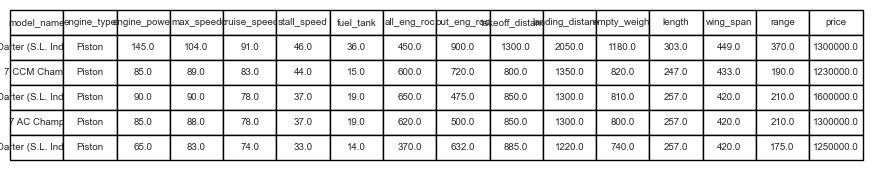

In [6]:
# Sélection des 5 premières lignes pour affichage
sample = df.head()

# Configuration de la figure
fig, ax = plt.subplots(figsize=(11, 1.5))
ax.axis('off')

# Création d'une table visuelle depuis le DataFrame
table = ax.table(
    cellText=sample.values,
    colLabels=sample.columns,
    cellLoc='center',
    loc='center'
)

# Ajustement de la taille du texte
table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(1, 1.5)

## Informations générales

In [7]:
# Types de colonnes et valeurs manquantes
df.info()

# Statistiques globales
df.describe().T

# Pourcentage de valeurs manquantes
(df.isna().mean() * 100).sort_values(ascending=False)

<class 'pandas.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_name        517 non-null    str    
 1   engine_type       517 non-null    str    
 2   engine_power      517 non-null    float64
 3   max_speed         517 non-null    float64
 4   cruise_speed      517 non-null    float64
 5   stall_speed       517 non-null    float64
 6   fuel_tank         517 non-null    float64
 7   all_eng_roc       517 non-null    float64
 8   out_eng_roc       517 non-null    float64
 9   takeoff_distance  517 non-null    float64
 10  landing_distance  517 non-null    float64
 11  empty_weight      517 non-null    float64
 12  length            517 non-null    float64
 13  wing_span         517 non-null    float64
 14  range             517 non-null    float64
 15  price             507 non-null    float64
dtypes: float64(14), str(2)
memory usage: 64.8 KB


price               1.934236
model_name          0.000000
engine_type         0.000000
engine_power        0.000000
max_speed           0.000000
cruise_speed        0.000000
stall_speed         0.000000
fuel_tank           0.000000
all_eng_roc         0.000000
out_eng_roc         0.000000
takeoff_distance    0.000000
landing_distance    0.000000
empty_weight        0.000000
length              0.000000
wing_span           0.000000
range               0.000000
dtype: float64

## Identification des types de variables

In [8]:
# Variables numériques
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Variables non numériques
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Variables numériques :", num_cols)
print("Variables catégorielles :", cat_cols)

Variables numériques : ['engine_power', 'max_speed', 'cruise_speed', 'stall_speed', 'fuel_tank', 'all_eng_roc', 'out_eng_roc', 'takeoff_distance', 'landing_distance', 'empty_weight', 'length', 'wing_span', 'range', 'price']
Variables catégorielles : ['model_name', 'engine_type']
